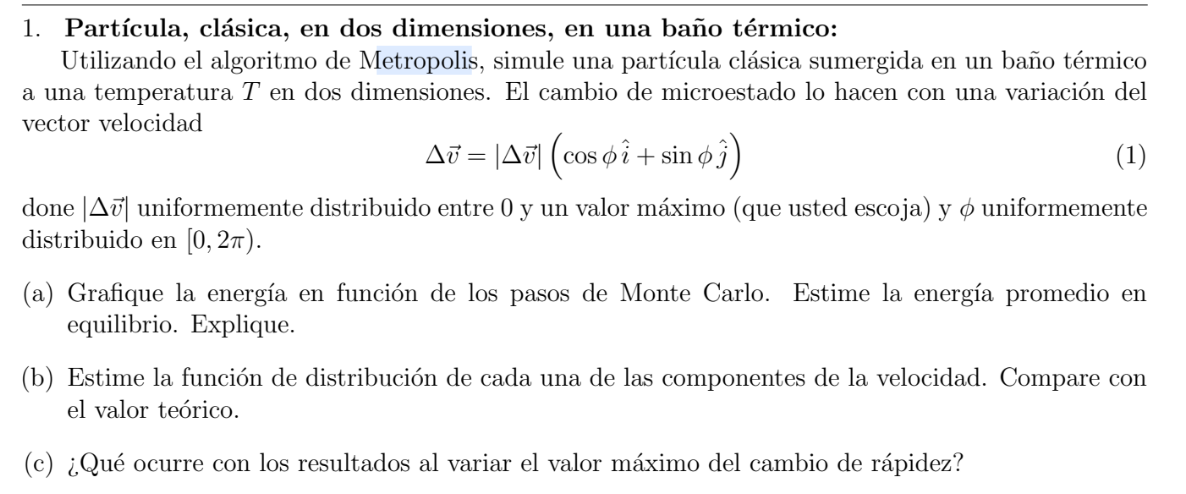

In [68]:
from random import random,randrange,seed
import numpy as np
import matplotlib.pyplot as plt 
import time

In [69]:
def GasIdealClasico2d(T,v0,delta,steps):
    # T: temperatura, v0: velocidad inicial,
    # steps: pasos de Montecarlo, delta: varicacion máxima de v
    # Main loop
    beta = 1./T
    k0 = 0.5*(v0*v0).sum()
    energia = [k0]
    velocidad = [v0]

    for mcs in range(steps):
        angulo = 2*np.pi*random() #definimos el ángulo (aleatorio entre 0 y 2pi)
        vmag = random()*delta #delta v un valor aleatorio entre 0 y 1
        vpruebax = v0[0] + vmag*np.cos(angulo)
        vpruebay = v0[1] + vmag*np.sin(angulo)
        kprueba = 0.5*(vpruebax*vpruebax+vpruebay*vpruebay)
        dk = kprueba-k0
        if dk < 0 or random() < np.exp(-beta*dk):
            v0 = [vpruebax,vpruebay]
            k0 = kprueba
        energia.append(k0)
        velocidad.append(v0)
    return np.array(energia),np.array(velocidad)

In [70]:
T = 10 #k_B T = 10
v0 = [10,0] #velocidad inicial
delta = 10 #maximo cambio de velocidades
steps = 1000000
energia,velocidad = GasIdealClasico2d(T,np.array(v0),delta,steps)

#Variando delta 
delta_1 = 20000
energia_1, velocidad_1 = GasIdealClasico2d(T,np.array(v0),delta_1,steps)

## a) Gráfica de la energía en función de los pasos de Monte Carlo. Estime la energía promedio en equilibrio. Explique 

In [71]:
print(velocidad)

[[10.          0.        ]
 [10.          0.        ]
 [ 7.46657246 -1.8966454 ]
 ...
 [-4.46810763 -5.79119772]
 [ 1.79557817 -7.15930573]
 [ 1.79557817 -7.15930573]]


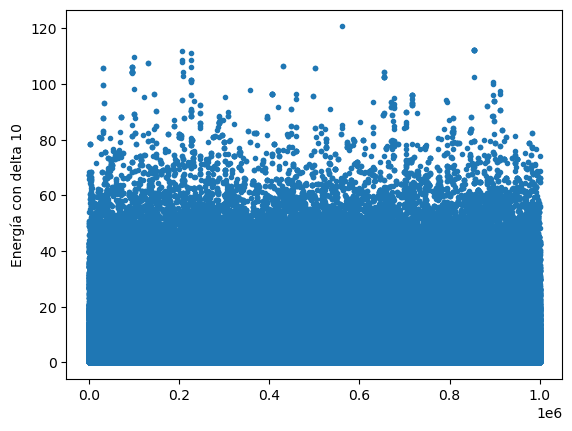

<E> = 9.971, kBT = 10.00, error = 0.29%


In [72]:
#Gráfica para 10 cambios de velocidades
plt.plot(energia,'.')
plt.ylabel("Energía con delta 10")
plt.show()
Eprom= np.mean(energia[10:])
print('<E> = {0:.3f}, kBT = {1:.2f}, error = {2:.2f}%'.format(Eprom,T,np.abs(Eprom-T)/(T)*100))



El valor teórico del valor esperado de la energía interna  para un gas ideal en N dimensiones es < E>= N/2(KbT). Debido a que en este caso se trabajan con dos dimensiones, < E>= KbT. Se observa que experimentalmente este valor se obtiene con un error menor al 1%

## b) Distribución de velocidades en x y y

In [73]:
vx= velocidad[:,0]
vy= velocidad[:,1]

Text(2.5, 0.12, '$P_B(v_y) = \\sqrt{\\beta m/2\\pi}\\,\\exp(-\\beta m v_y^2/2)$')

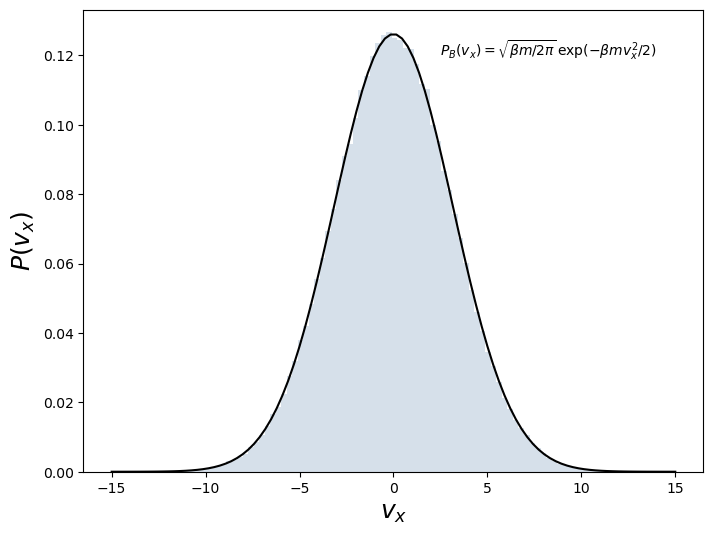

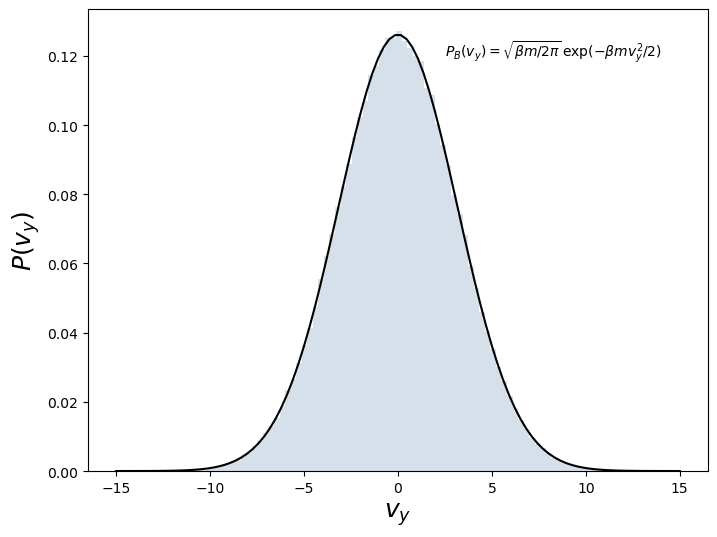

In [74]:


#Para x 

otrocolor = [(0.2, 0.4, 0.6, 0.2)]
beta = 1/T
plt.figure(figsize=(8,6))
n, bins, patches = plt.hist(vx, bins = 100,color = otrocolor,density = True)
x = np.linspace(-15,15,100)
Pb = np.sqrt(beta/(2*np.pi))*np.exp(-beta*x**2/2)
plt.plot(x,Pb,'k-')
plt.ylabel(r'$P(v_x)$',fontsize = 18)
plt.xlabel(r'$v_x$',fontsize = 18)
plt.text(2.5,0.12,r'$P_B(v_x) = \sqrt{\beta m/2\pi}\,\exp(-\beta m v_x^2/2)$')


#Para y 
otrocolor = [(0.2, 0.4, 0.6, 0.2)]
beta = 1/T
plt.figure(figsize=(8,6))
n, bins, patches = plt.hist(vy, bins = 100,color = otrocolor,density = True)
x = np.linspace(-15,15,100)
Pb = np.sqrt(beta/(2*np.pi))*np.exp(-beta*x**2/2)
plt.plot(x,Pb,'k-')
plt.ylabel(r'$P(v_y)$',fontsize = 18)
plt.xlabel(r'$v_y$',fontsize = 18)
plt.text(2.5,0.12,r'$P_B(v_y) = \sqrt{\beta m/2\pi}\,\exp(-\beta m v_y^2/2)$')

Se observa que ambas velocidades siguen una distribución gaussiana, con la mayor probabilidad de velocidad en 0 ya que es igual de probable que se muevan hacia un lado que hacia el otro. La gran mayoría de velocidades se encuentran en el intervalo entre -10 y 10 debido a que ese es el delta que se escogió.

### c) Al variar Delta

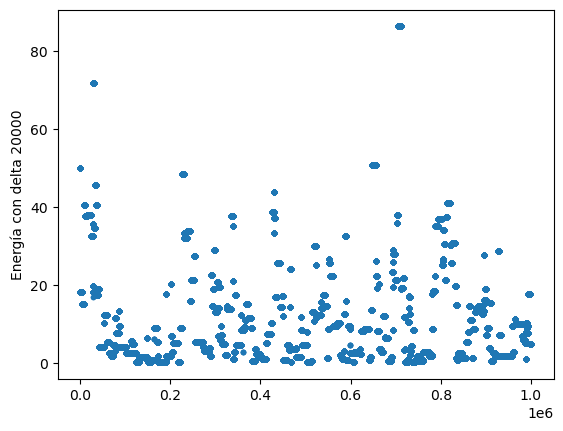

<E> = 11.155, kBT = 10.00, error = 11.55%


Text(2.5, 0.12, '$P_B(v_y) = \\sqrt{\\beta m/2\\pi}\\,\\exp(-\\beta m v_y^2/2)$')

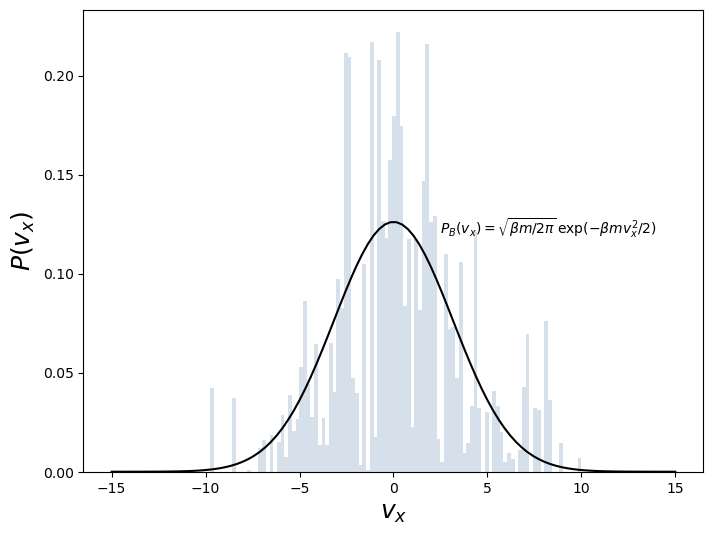

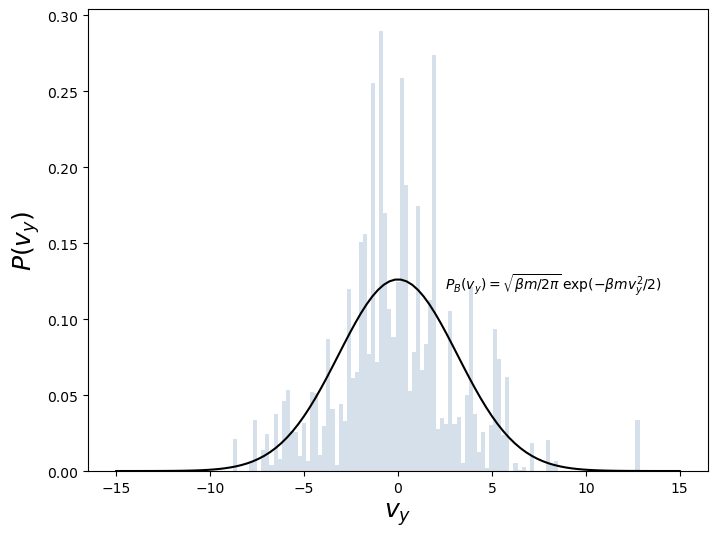

In [75]:
#Gráfica para 20000 cambios de velocidades
plt.plot(energia_1,'.')
plt.ylabel("Energía con delta 20000")
plt.show()
Eprom= np.mean(energia_1[100:])
print('<E> = {0:.3f}, kBT = {1:.2f}, error = {2:.2f}%'.format(Eprom,T,np.abs(Eprom-T)/(T)*100))

vx_1= velocidad_1[:,0]
vy_1= velocidad_1[:,1]

#Para x 

otrocolor = [(0.2, 0.4, 0.6, 0.2)]
beta = 1/T
plt.figure(figsize=(8,6))
n, bins, patches = plt.hist(vx_1, bins = 100,color = otrocolor,density = True)
x = np.linspace(-15,15,100)
Pb = np.sqrt(beta/(2*np.pi))*np.exp(-beta*x**2/2)
plt.plot(x,Pb,'k-')
plt.ylabel(r'$P(v_x)$',fontsize = 18)
plt.xlabel(r'$v_x$',fontsize = 18)
plt.text(2.5,0.12,r'$P_B(v_x) = \sqrt{\beta m/2\pi}\,\exp(-\beta m v_x^2/2)$')


#Para y 
otrocolor = [(0.2, 0.4, 0.6, 0.2)]
beta = 1/T
plt.figure(figsize=(8,6))
n, bins, patches = plt.hist(vy_1, bins = 100,color = otrocolor,density = True)
x = np.linspace(-15,15,100)
Pb = np.sqrt(beta/(2*np.pi))*np.exp(-beta*x**2/2)
plt.plot(x,Pb,'k-')
plt.ylabel(r'$P(v_y)$' ,fontsize = 18)
plt.xlabel(r'$v_y$',fontsize = 18)
plt.text(2.5,0.12,r'$P_B(v_y) = \sqrt{\beta m/2\pi}\,\exp(-\beta m v_y^2/2)$')

Al aumentar dramáticamente llos cambios máximos de velocidades, se puede observar que el promedio de energía cinética ya no concuerda tanto con el valor teórico esperado para el gas ideal ya que hay un error mayor al 10%. Además, las probabilidades de las velocidades ya no se ajustan a una distribución gaussiana, debido a que hay más dispersión en el sistema y en los distintos valores de velocidades que cada partícula puede tomar.Un aumento en número de muestrar, es decir, los pasos del método Montecarlo, verían que los datos se acoplarían mejor a la gaussiana pero requiere mucho poder de computación.